In [1]:
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim

def visualize_precision_and_recall(precision, recall):

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(precision, recall, c='blue', marker='o')

    plt.xlim(0, 1.1)
    plt.ylim(0, 1.1)

    # Add labels and a legend
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision vs. Recall')
    plt.legend()

    # Display the plot
    plt.grid(True)
    return plt


/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_d

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

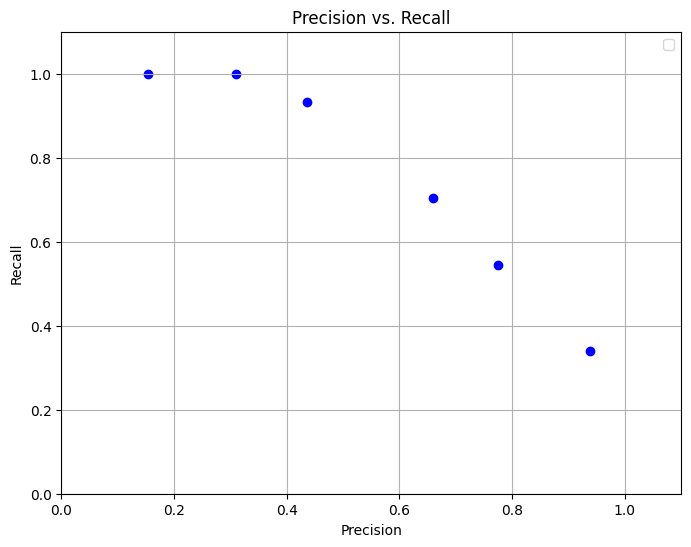

In [2]:
import pandas as pd
data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Rozenberg et al 2014.csv')

prec = []
rec = []

y = data['SSP1']
temp_data = pd.DataFrame(data.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
x = temp_data.values

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

for index, row in box1.peeling_trajectory.iterrows():
    rec.append(row['coverage'])
    prec.append(row['density'])
    
visualize_precision_and_recall(prec, rec)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

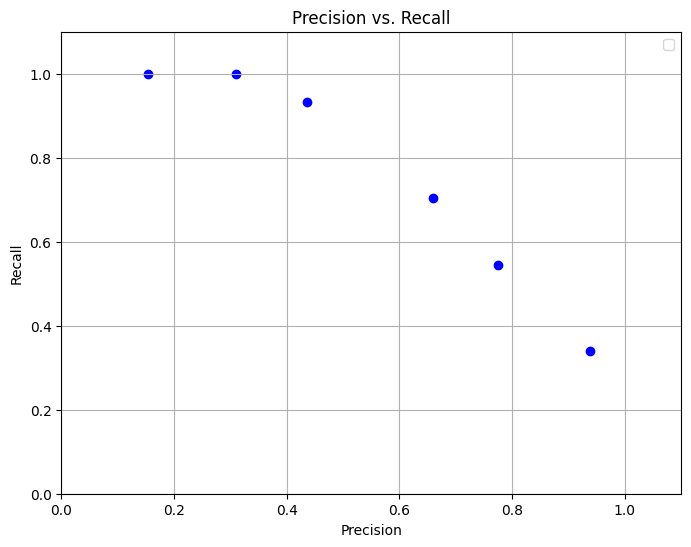

In [6]:
import pandas as pd
data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Rozenberg et al 2014.csv')

prec = []
rec = []

y = data['SSP1']
temp_data = pd.DataFrame(data.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
x = temp_data.values

#fit PRIM algorithm and get limits of nested boxes
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

#print baseline result
for index, row in box1.peeling_trajectory.iterrows():
    rec.append(row['coverage'])
    prec.append(row['density'])

visualize_precision_and_recall(prec, rec)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

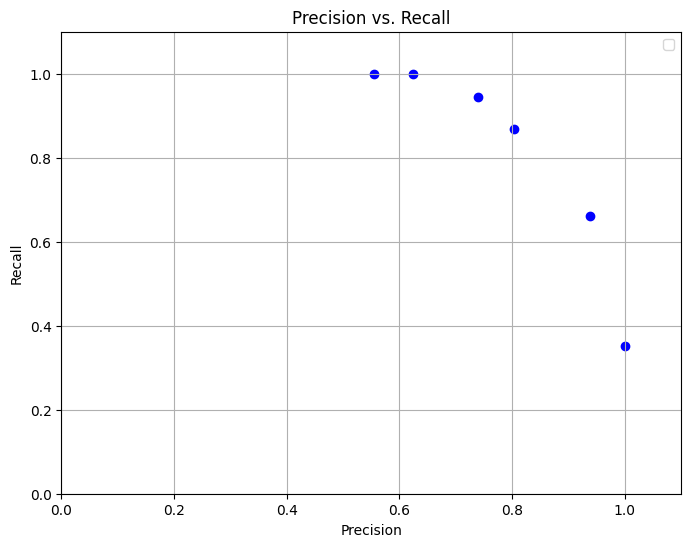

In [4]:
lims = box1.box_lims

#set new dataset were rows in boxes are going to be duplicated 
new_data = temp_data
new_labels = y

prec = []
rec = []

#iterate over limit entries which is list of dataframes
for i in range(len(lims)):
    # Iterate over each row of temp_data
    for index, row in temp_data.iterrows():
        is_within_limits = True
        a = 0
        # Check if entry lies within the specified limits
        for column, value in row.iteritems():
            is_within_limits = (lims[i].iloc[0, a] <= value <= lims[i].iloc[1, a]) & is_within_limits
            a = a + 1
        if is_within_limits:
            new_data.loc[len(new_data)] = row
            new_labels.loc[len(y)] = y[index]

prim_alg2 = prim.Prim(new_data.values, new_labels, threshold=0.8, peel_alpha=0.1)
box2 = prim_alg2.find_box()

for index, row in box2.peeling_trajectory.iterrows():
    rec.append(row['coverage'])
    prec.append(row['density'])
    
visualize_precision_and_recall(prec, rec)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

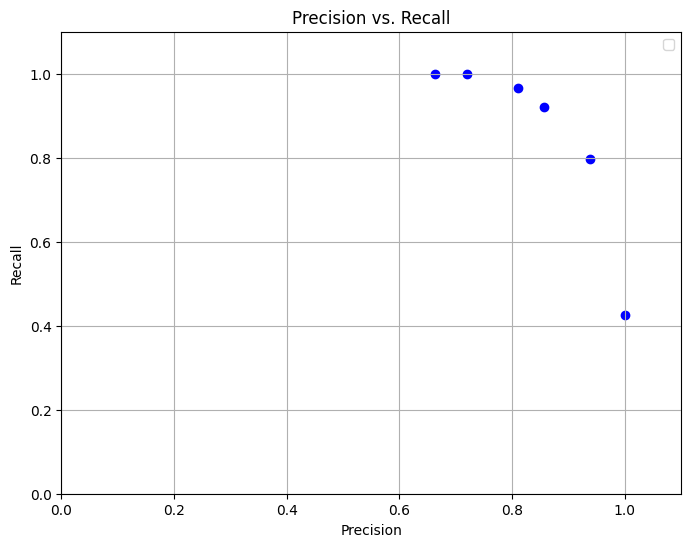

In [5]:
lims = box1.box_lims

#set new dataset were rows in boxes are going to be duplicated 
new_data = temp_data
new_labels = y

prec = []
rec = []

# Iterate over each row of temp_data
for index, row in temp_data.iterrows():
    is_within_limits = True
    a = 0
    # Check if entry lies within the specified limits
    for column, value in row.iteritems():
        is_within_limits = (lims[len(lims) - 1].iloc[0, a] <= value <= lims[len(lims) - 1].iloc[1, a]) & is_within_limits
        a = a + 1
    if is_within_limits:
        new_data.loc[len(new_data)] = row
        new_labels.loc[len(y)] = y[index]

prim_alg3 = prim.Prim(new_data.values, new_labels, threshold=0.8, peel_alpha=0.1)
box3 = prim_alg3.find_box()

for index, row in box3.peeling_trajectory.iterrows():
    rec.append(row['coverage'])
    prec.append(row['density'])
    
visualize_precision_and_recall(prec, rec)